<a href="https://colab.research.google.com/github/aricahyasaputra/data-sains-course-assigment-/blob/main/Quiz/Quiz_Minggu_12_Regresi_Non_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama Kelompok :     
*   Ari Cahya Saputra
*   Salman Al Farisi
   
NIM : 
*   1103190093
*   1103194131

Kelas : TK-42-PIL1


Data set : https://www.kaggle.com/datasets/imdevskp/corona-virus-report?select=day_wise.csv

# Contoh Regresi Non Linier
---

Sebagai contoh, kita akan mencoba dan menyesuaikan model non-linier ke titik data yang sesuai dengan PDB Tiongkok dari tahun 1960 hingga 2014. Kita mengunduh kumpulan data dengan dua kolom, yang pertama, satu tahun antara 1960 dan 2014, yang kedua, Pendapatan domestik bruto tahunan China yang sesuai dalam dolar AS untuk tahun itu.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/aricahyasaputra/data-sains-course-assigment-/main/Quiz/day_wise.csv")
# melihat dataset
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [4]:
# merangkum data
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


### Memplot dataset
---
Berikut adalah apa yang terlihat seperti titik-titik data. Hasil plotting terlihat seperti fungsi logistik atau eksponensial. Pertumbuhannya mulai lambat, kemudian dari tahun 2005 ke depan, pertumbuhannya sangat signifikan. Dan akhirnya, sedikit melambat di tahun 2010-an.

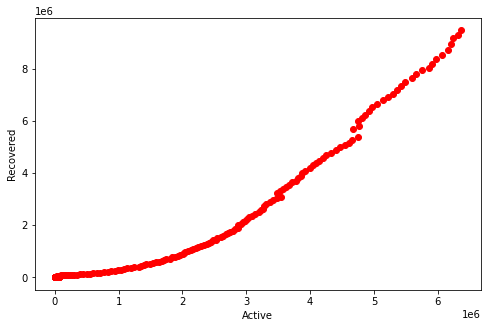

In [5]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Active"].values, df["Recovered"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Recovered')
plt.xlabel('Active')
plt.show()

### Pemilihan Model 
---

Dari tampilan awal plot, kita dapat menentukan bahwa fungsi logistik bisa menjadi pendekatan yang baik,
karena memiliki sifat mulai dengan pertumbuhan lambat, pertumbuhan meningkat di tengah, dan kemudian menurun lagi di akhir; seperti diilustrasikan di bawah ini:

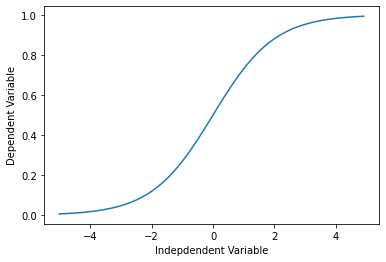

In [6]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()


Rumus untuk fungsi logistik adalah sebagai berikut:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Mengontrol kecuraman kurva,

$\beta_2$: Menggeser kurva pada sumbu x.

### Pembuatan Model 
---
Model regresi dan inisialisasi parameternya dapat dibuat.

In [7]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Contoh garis sigmoid yang mungkin cocok dengan data dapat dilihat:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


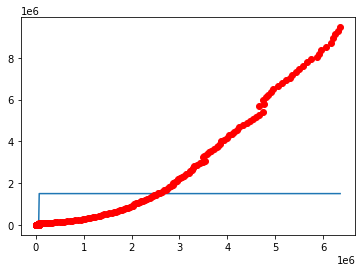

In [62]:
beta_1 = 0.9
beta_2 = 63583
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*1500000.)
plt.plot(x_data, y_data, 'ro')

Tugas yang harus dilakukan adalah menemukan parameter terbaik untuk model. Normalisasi x dan y diperlukan:

In [41]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### Bagaimana menemukan parameter terbaik untuk pencocokan kurva?


__curve_fit__ yang menggunakan least square non-linear agar sesuai dengan fungsi sigmoid, terhadap data dapat digunakan. Nilai optimal untuk parameter sehingga jumlah residu kuadrat dari sigmoid(xdata, *popt) - ydata diminimalkan.

popt adalah parameter yang dioptimalkan.

In [42]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 6.598248, beta_2 = 0.662739


Hasil model regressi dapat diplot:

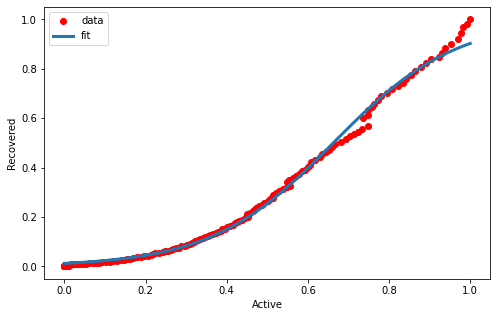

In [63]:
x = np.linspace(510, 6358362 , 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Recovered')
plt.xlabel('Active')
plt.show()